In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flipkart Smartphone Market Analysis

## Data Preprocessing, Feature Engineering & EDA

This notebook performs:

- Data Cleaning
- Feature Engineering
- Exploratory Data Analysis

Scraping logic is implemented separately in:
`scraping_scripts/scrape_flipkart_smartphones.py`

## Data cleaning & Feature Engineering

In [33]:
df=pd.read_csv("flipkart phones.csv")

In [35]:
df=df.drop(columns=["Unnamed: 0"])

In [36]:
df["Model"]=df["Product"].str.findall(r"([A-Za-z]+(?:\s[A-Za-z]+)*\s*\d+)").str[0]

In [37]:
df["ROM"]=df["Storage"].str.findall(r"(\d+\s*GB\s*ROM)").str[0]
df["RAM"]=df["Storage"].str.findall(r"[0-9]+ GB RAM").str[0]

In [38]:
df["Warranty"]=df["Warranty"].str.findall(r"[0-9]+").str[0]

In [39]:
df["Battery"]=df["Battery"].str.findall(r"\d+").str[0]

In [40]:
df["Price"]=df["Price"].str.findall(r"\d+").str.join("")

In [41]:
df[["Back_camera","Front_camera"]]=df["Camera"].str.split("|",expand=True)

In [42]:
df["ROM"]=df["ROM"].str.findall(r"\d+").str[0]
df["RAM"]=df["RAM"].str.findall(r"\d+").str[0]

In [43]:
df["Back_camera"]=df["Back_camera"].str.findall(r"[0-9]+").str[0]
df["Front_camera"]=df["Front_camera"].str.findall(r"[0-9]+").str[0]

In [45]:
df["Price"]=df["Price"].astype(float)
df["Warranty"]=df["Warranty"].astype(float)
df["Battery"]=df["Battery"].astype(float)
df["ROM"]=df["ROM"].astype(float)
df["RAM"]=df["RAM"].astype(float)
df["Front_camera"]=df["Front_camera"].astype(float)
df["Back_camera"]=df["Back_camera"].astype(float)

In [48]:
df["Warranty"]=df["Warranty"].replace(12.0,1)

In [49]:
df["Availability"]=df["Availability"].fillna("Available")

In [2]:
df=pd.read_csv("flipkart phones cleaned2.csv")

In [3]:
df.duplicated().sum()

np.int64(10)

In [4]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Product            0
Price              4
Availability       0
Camera             0
Processor        659
Storage            0
Ratings           78
Rivews          3415
Warranty         727
Battery          597
Model            182
ROM               72
RAM              611
Back_camera        0
Front_camera       0
dtype: int64

In [6]:
df["Warranty"]=df["Warranty"].fillna(0)
df["ROM"]=df["ROM"].fillna(df["ROM"].mean())
df["RAM"]=df["RAM"].fillna(df["RAM"].mean())
df["Battery"]=df["Battery"].fillna(df["Battery"].mean())
df=df.drop("Rivews", axis=1)
df = df.dropna(subset=["Model"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 3424
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       3233 non-null   object 
 1   Price         3229 non-null   float64
 2   Availability  3233 non-null   object 
 3   Camera        3233 non-null   object 
 4   Processor     2600 non-null   object 
 5   Storage       3233 non-null   object 
 6   Ratings       3159 non-null   float64
 7   Warranty      3233 non-null   float64
 8   Battery       3233 non-null   float64
 9   Model         3233 non-null   object 
 10  ROM           3233 non-null   float64
 11  RAM           3233 non-null   float64
 12  Back_camera   3233 non-null   float64
 13  Front_camera  3233 non-null   float64
dtypes: float64(8), object(6)
memory usage: 378.9+ KB


In [8]:
df["Brand"]=df["Model"].str.split(" ").str[0]

# Univariate Analysis

In [10]:
df["Availability"].value_counts()

Availability
Currently unavailable    1464
Available                1301
Coming Soon               468
Name: count, dtype: int64

In [11]:
df["Brand"].value_counts()

Brand
Samsung    1254
Apple       516
POCO        339
vivo        320
OnePlus     247
OPPO        209
IQOO        145
Lenovo       86
Google       50
Honor        40
CMF          16
Huawei        8
Nexus         3
Name: count, dtype: int64

# BI- Variate Analysis

In [12]:
pd.pivot_table( df, values="Price", index="Brand", aggfunc="mean")

,Price
Brand,
Apple,97862.038760
CMF,17749.000000
Google,79733.040000
Honor,24017.975000
Huawei,26120.750000
IQOO,29212.951724
Lenovo,13421.616279
Nexus,22832.333333
OPPO,26957.550239


In [25]:
df.groupby("Model")["Availability"].count().reset_index()

,Model,Availability
0,Apple IPhone 4,2
1,Apple iPhone 11,42
2,Apple iPhone 12,61
3,Apple iPhone 13,78
4,Apple iPhone 14,66
...,...,...
397,vivo Y90,1
398,vivo Y91,5
399,vivo Y93,3
400,vivo Z1,6


In [24]:
( df
    .groupby(['Brand', 'Availability'])['Price']
    .agg(mean_price='mean', median_price='median', count='count')
    .reset_index())

,Brand,Availability,mean_price,median_price,count
0,Apple,Available,93460.147059,71000.0,68
1,Apple,Coming Soon,101464.850000,89900.0,80
2,Apple,Currently unavailable,97892.211957,84900.0,368
3,CMF,Coming Soon,17999.000000,17999.0,3
4,CMF,Currently unavailable,17691.307692,17999.0,13
5,Google,Available,91506.750000,94999.0,28
6,Google,Coming Soon,72399.000000,49999.0,5
7,Google,Currently unavailable,62498.117647,49999.0,17
8,Honor,Available,23216.068966,15999.0,29
9,Honor,Coming Soon,19990.000000,19990.0,1


# Uni-Variate (Visualiazation)

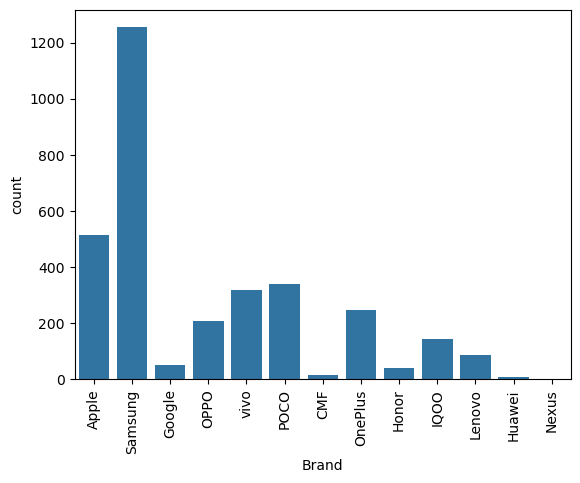

In [15]:
sns.countplot(x="Brand",data=df)
plt.xticks(rotation=90)
plt.show()

In [16]:
Apple=df.loc[df["Brand"]=="Apple",["Model","Availability"]]

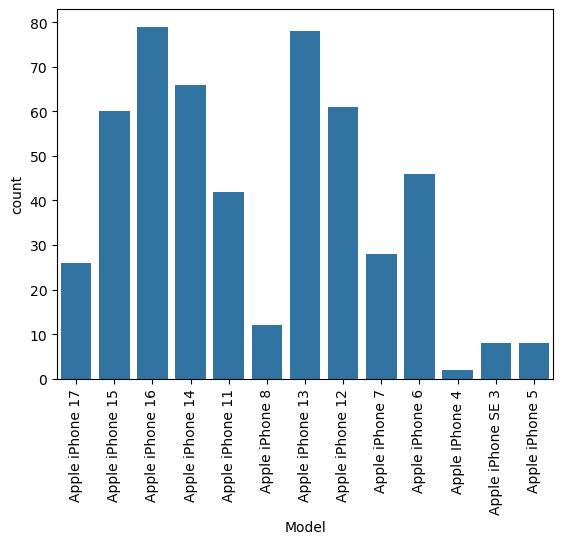

In [17]:
sns.countplot(x="Model",data=Apple)
plt.xticks(rotation=90)
plt.show()

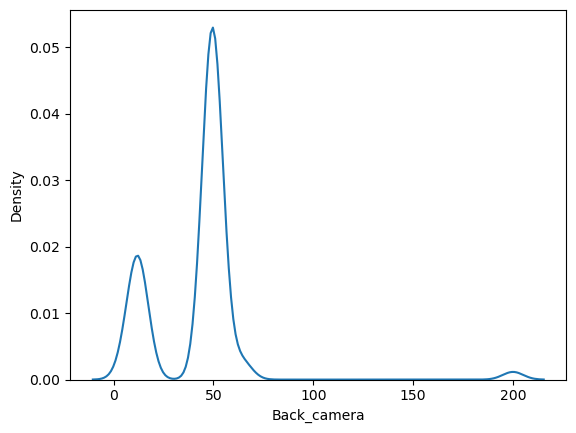

In [18]:
sns.kdeplot(x="Back_camera",data=df)
plt.show()

# BI-Variate Visualizations

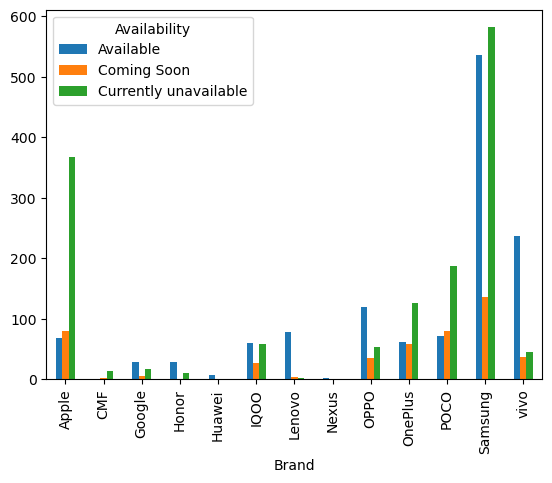

In [19]:
a=pd.crosstab(df["Brand"],df["Availability"]).plot(kind="bar")

<Axes: xlabel='Brand'>

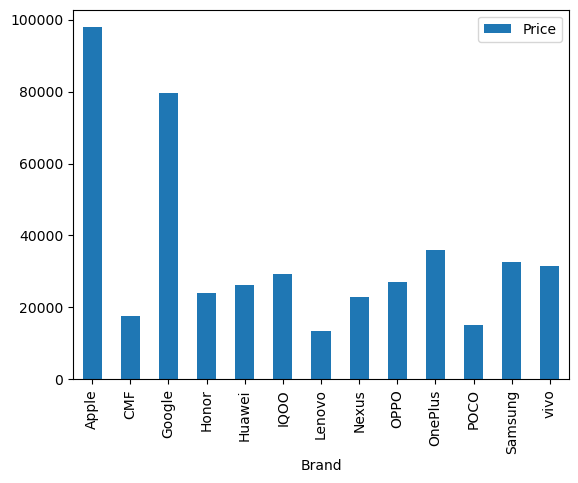

In [20]:
pd.pivot_table(data=df,values="Price",index="Brand").plot(kind="bar")

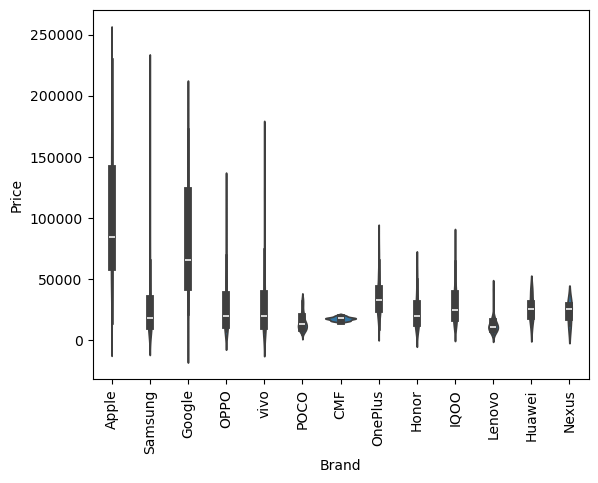

In [21]:
sns.violinplot (data=df,x="Brand",y="Price")
plt.xticks(rotation=90)
plt.show()

<Axes: >

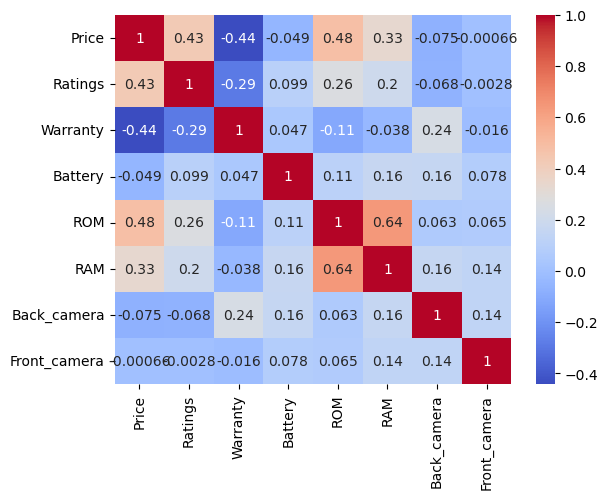

In [22]:
numeric_df=df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm")